# Pendahuluan
Ketika kita akan melakukan analisis data, entah itu prediksi atau klasifikasi, kita membutuhkan data yang cukup banyak. Hal itu untuk akan membantu kita untuk memenuhi signifikan statistik untuk pengujian hipotesis kita nantinya. Makin banyak data makin baik, walau ketika belajar Confidence Level dan Interval ternyata pengujian terhadap sampel random lebih baik [sekitar 10% dari populasi](https://www.qualtrics.com/blog/determining-sample-size/).

Misalnya, kita sudah menentukan populasi, Confidence Level, dan Confidence Interval, maka kita bisa menentukan sampel dan melakukan pengambilan data. Ternyata data yang kita dapat memiliki banyak fitur atau dimensi. Contohnya data di bawah ini:
![Human Development Index based on GDP](http://thumbnails116.imagebam.com/51544/a7aa47515437701.jpg)  
Kesusahan akan terjadi ketika kita akan melakukan analisis terhadap data di atas. Jumlah fitur atau dimensinya cukup banyak, yaitu 12. Untuk melakukan prediksi atau klasifikasi terhadap data dengan lebh dari 3 dimensi saja sudah lumayan memakan waktu dan biaya komputasi, apalagi dengan 12 dimensi.

_Dimensionality reduction_ adalah konsep untuk menemukan pola dalam sehingga kita bisa melakukan pengurangan (reduksi) terhadap jumlah dimensi dengan tetap mempertahankan informasi relevan yang ada dalam data. Keluaran yang diinginkan adalah kita mentransformasikan data berdimensi _n_ menjadi data berdimensi _k_. Tujuan kita melakukan dimensionality reduction, adalah: (a) menurunkan biaya komputasi yang dibutuhkan ketika melakukan inferensi lanjutan; (b) mempermudah ketika akan melakukan visualisasi data, tentu lebih mudah melakukan visualisasi data berdimensi 3 ke bawah.

# Principal Component Analysis (PCA)
Principal Component Analysis atau PCA merupakan [salah satu metode](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) yang digunakan dalam _dimensionality reduction_. PCA berusaha melakukan proyeksi keseluruhan data (tanpa label) ke subspace yang berbeda dimensi. Misal, kita memiliki data berdimensi 3, PCA akan memproyeksikan semua data tersebut ke sebuah permukaan yang bisa digambar ke dalam diagram cartesius berdimensi 2.
## Algoritma PCA
1. [Mendapatkan data: x(1), x(2), … x(m)](#get-data)
2. [Prapemrosesan data: kuantifikasi, normalisasi and _feature scaling_](#prapemrosesan)
3. [Menghitung matriks covariance C](#covariance)
4. [Menghitung eigenvector dan eigenvalues matriks C](#eigenvector)
5. [Memilih sejumlah _k_ eigenvector](#eigenvalue)
6. [Mendapatkan matriks proyeksi](#final)

# Implementasi PCA dengan Python
Kita akan menunjukkan contoh melakukan PCA dengan Python dan data Human Development Report berdasarkan GDP. Sebenarnya data Human Development dari UNDP memiliki banyak sheet, namun kita akan mengambil satu sheet saja. File excel Human Development Report tahun 2014 dari UNDP bisa diunduh di [link ini](http://hdr.undp.org/sites/default/files/hdr14_statisticaltables.xls).
<a name="get-data"></a>
## Mendapatkan Data
Kita sudah membersihkan data sheet yang digunakan. Excel yang digunakan dalam PCA kali ini bisa diunduh di [sini](https://mega.nz/#!fJM0lTDI!YHrQM8JphLPdjHhsgil2kg-RoKIn3xboC2Tvd7XIfIM).
Pertama kita akan mengimport package python yang digunakan dan akan melakukan pembacaan data excel dan mengubanya menjadi struktur matriks. Label negara maupun nama variabel tidak kita masukkan.

In [67]:
import openpyxl
import numpy as np

# Membaca excel
excel = openpyxl.load_workbook('HDI_from_GDP.xlsx')
sheet = excel.get_sheet_by_name('Sheet1')

# Mengambil setiap nilai cell dalam excel dan menyimpannya menjadi array
_matrix = np.zeros((14,12))
for rowNum in range(4,sheet.max_row+1):
    for col in range(3,sheet.max_column):
        #_row.append(sheet.cell(row=rowNum,column=col).value)
        _matrix[rowNum-4,col-3]= sheet.cell(row=rowNum, column=col).value

print(_matrix)

[[  3.15457507e+02   6.28580090e+04   2.05729366e+01   2.13114427e+01
    1.80451566e+00   3.29530689e+01   1.69491000e+00   1.15605023e+00
    8.69562223e+01   1.14159484e+02   1.15000000e+00   6.80000000e+00]
 [  9.60647458e+02   4.22782967e+04   2.78527873e+01   1.79319801e+01
    3.40796465e+00   6.36466130e+01   2.37364000e+00   2.39385620e+00
    1.54355462e+02   1.21814980e+02   1.16000000e+00   1.27000000e+01]
 [  4.10179738e+02   5.12925932e+04   2.04037006e+01   1.11175230e+01
    1.96672903e+00   2.41758012e+01   2.99067000e+00   7.31279544e-01
    1.92629870e+02   1.04030456e+02   1.05000000e+00   9.20000000e+00]
 [  7.11291376e+02   4.24525807e+04   1.68375960e+01   2.84036308e+01
    7.32791100e-03   2.51958989e+01   1.83017000e+00   1.68612939e+00
    2.16042608e+02   1.13215978e+02   8.90000000e-01   4.20000000e+00]
 [  1.59654779e+04   5.08593942e+04   1.46911876e+01   1.73060375e+01
   -2.64451525e+00   5.48883281e+01   2.89662000e+00   1.09164206e+00
    2.31568654e+

Kita mendapatkan matriks seperti di atas. Mencetak matriks dari numpy memang tampilannya kurang jelas dan seringkali membingungkan. Untuk keperluan visualisasi saja, kita akan mengkonversi matriks numpy menjadi dataframe panda agar tampilan matriksnya lebih jelas dan mudah dibaca.

In [69]:
import pandas as pd
df = pd.DataFrame(_matrix)
print(df)

              0            1          2          3         4          5   \
0     315.457507  62858.00895  20.572937  21.311443  1.804516  32.953069   
1     960.647458  42278.29673  27.852787  17.931980  3.407965  63.646613   
2     410.179738  51292.59315  20.403701  11.117523  1.966729  24.175801   
3     711.291376  42452.58065  16.837596  28.403631  0.007328  25.195899   
4   15965.477910  50859.39421  14.691188  17.306037 -2.644515  54.888328   
5    3375.183468  41966.41504  17.568641  19.483019  1.163728  15.400176   
6     143.456145  32360.23219  18.814000  20.146640  0.309916  45.784014   
7    1410.609577  40588.04493  22.012476  20.885040  0.788332  53.273422   
8     379.703196  71474.88818  24.125732   9.656891 -3.553578  34.364665   
9     232.186334  41524.33942  17.622883  28.573595  0.168006  38.889080   
10    196.863235  42918.60825  10.047373  17.567459 -3.384261  36.005459   
11    398.287537  41839.67738  18.770612  26.853118  0.735463  11.221613   
12     12.36

Kini isi matriks tercetak dengan lebih jelas. Bisa kita perhatikan bahwa matriks ini adalah matriks 14x12, terdiri dari 14 baris (sesuai dengan banyak negara) dan 12 kolom (sesuai dengan banyak variabel). Dataframe df ini tidak akan kita gunakan untuk langkah selanjutnya, lebih mudah menghitung covariance dan eigenvector dengan numpy. Dataframe akan digunakan untuk tujuan mencetak isi matriks saja.
<a name="prapemrosesan"></a>
## Prapemrosesan Data
Setelah mendapatkan representasi data dalam matriks, sekarang saatnya untuk melakukan normalisasi dan _feature scaling_. Kalau kita perhatikan di keluaran matriks di atas, nilai satu data dengan data lain memiliki perbedaan yang cukup jauh karena itu kita perlu melakukan normalisasi. Langkah ini adalah langkah yang sangat penting, karena bila kita tidak melakukan normalisasi akan berakibat pada hilangnya informasi dalam data. Padahal kita berusaha menjadi informasi yang ada tetap relevan atau minimal hilangnya.

In [76]:
# Kita membuat matriks baru, yaitu matriks normalisasi
matrixNorm = (_matrix - _matrix.mean()) / _matrix.std()
#print(matrixNorm)
dfn = pd.DataFrame(matrixNorm)
print(dfn)

          0         1         2         3         4         5         6   \
0  -0.283671  4.565030 -0.306532 -0.306475 -0.307987 -0.305572 -0.307996   
1  -0.233652  2.969558 -0.305968 -0.306737 -0.307863 -0.303193 -0.307943   
2  -0.276327  3.668404 -0.306545 -0.307265 -0.307975 -0.306253 -0.307895   
3  -0.252983  2.983070 -0.306822 -0.305925 -0.308127 -0.306174 -0.307985   
4   0.929619  3.634820 -0.306988 -0.306785 -0.308332 -0.303872 -0.307903   
5  -0.046461  2.945379 -0.306765 -0.306617 -0.308037 -0.306933 -0.307909   
6  -0.297006  2.200646 -0.306669 -0.306565 -0.308103 -0.304578 -0.308026   
7  -0.198768  2.838519 -0.306421 -0.306508 -0.308066 -0.303997 -0.307988   
8  -0.278690  5.233066 -0.306257 -0.307378 -0.308403 -0.305463 -0.307939   
9  -0.290127  2.911107 -0.306761 -0.305912 -0.308114 -0.305112 -0.307890   
10 -0.292865  3.019199 -0.307348 -0.306765 -0.308390 -0.305336 -0.307988   
11 -0.277249  2.935554 -0.306672 -0.306045 -0.308070 -0.307257 -0.307864   
12 -0.307169

<a name="covariance"></a>
## Menghitung Matriks Covariance
PCA menggunakan aljabar linier, tepatnya operasi matriks, untuk melakukan proyeksi. Dengan menggunakan operasi matriks tersebut, PCA berusaha menjaga informasi relevan tetap ada, walau akan mereduksi jumlah fitur. Matriks covariance adalah matriks yang menunjukkan besarnya hubungan antara variabel dalam matriks asal. Anggap kita punya 2 vektor X(x1, x2) dan Y(y1, y2). Maka ada 4 covariance yang harus diukur: x1 dengan y1, x1 dengan y2, x2 dengan y1 , dan x2 dengan y2.  
Rumus covariance:  
![Rumus Covariance](http://resources.esri.com/help/9.3/ArcGISEngine/java/gp_toolref/spatial_analyst_tools/sa_multivar_bandcollectionstats_frmla_1.gif)  
Perlu diperhatikan bila kita memiliki _n_ dimensi, maka hasil dari covariance adalah matriks berukuran _nxn_. Kita sedang menganalisis data dengan 12 dimensi, sehingga matriks covariance kita adalah 12x12. Kita akan menggunakan numpy untuk menghitung matriks covariance sehingga tidak perlu menghitung satu-satu nilai covariance.

In [79]:
covarianceMatrix = np.cov(matrixNorm.T)
dfcov = pd.DataFrame(covarianceMatrix)
print('Covariance matrix \n%s\n' %dfcov)

Covariance matrix 
              0             1             2             3             4   \
0   1.036876e-01  2.450832e-02 -2.626427e-05 -2.347956e-05 -1.597201e-05   
1   2.450832e-02  6.786945e-01  1.059987e-04 -2.072808e-04 -4.778791e-05   
2  -2.626427e-05  1.059987e-04  1.227886e-07 -4.998165e-08  2.379984e-08   
3  -2.347956e-05 -2.072808e-04 -4.998165e-08  1.981826e-07  1.786986e-08   
4  -1.597201e-05 -4.778791e-05  2.379984e-08  1.786986e-08  2.626246e-08   
5   1.238566e-04 -5.737301e-05  1.259787e-07 -1.103952e-07 -1.026039e-09   
6   3.934709e-06  5.875836e-06  1.068221e-09  4.353130e-10 -1.578062e-10   
7  -1.137838e-05 -6.895307e-05 -9.704455e-09  2.423733e-08  1.338211e-09   
8   4.464385e-04 -1.387071e-03 -5.979899e-07  3.311973e-07 -6.599780e-08   
9  -2.850565e-05 -1.339980e-04 -5.269599e-08  9.880123e-08 -1.885051e-08   
10 -8.532318e-07  4.955890e-07  1.591190e-09 -8.797615e-10  2.422975e-10   
11 -2.916951e-05 -1.471380e-04 -3.525792e-08  7.301162e-08  9.338333e

<a name="eigenvector"></a>
## Menghitung Eigenvector dan Eigenvalue
Setelah mendapatkan matriks covariance, kita mendapatkan hubungan dari masing-masing variabel yang ada. Namun, kita tidak tahu bagaimana membagi hubungan yang ada. Maksudnya, bila variabel 1 memiliki hubungan yang kuat terhadap variabel 2, belum tentu variabel 1 memiliki hubungan yang sama dengan variabel 3. Kita perlu melihat hubungan dari setiap nilai covariance yang ada dengan mendapatkan eigenvector dan eigenvalue yang tetap memuaskan matriks covariance yang ada.  
Rumus eigenvector dan eigenvalue:
![Rumus eigen](http://thumbnails115.imagebam.com/51545/a9db7f515444852.jpg)
Dengan mendapatkan eigenvector, kita akan mendapatkan vektor-vektor yang bisa merepresentasikan matriks covariance. Sedangkan eigenvalue menunjukkan nilai atau besar dari eigenvector.

In [82]:
eigenvalue, eigenvector = np.linalg.eig(covarianceMatrix)
dfev = pd.DataFrame(eigenvector)
print('Eigenvector \n%s\n' %dfev)
print('Eigenvalue \n%s\n' %eigenvalue)

Eigenvector 
              0         1         2         3         4         5         6   \
0   4.250519e-02  0.999084  0.004866  0.001026 -0.000513 -0.000002  0.000213   
1   9.990941e-01 -0.042495 -0.002134 -0.000586 -0.000387 -0.000234  0.000131   
2   1.541582e-04 -0.000300  0.030933 -0.018685  0.187100  0.106555  0.508513   
3  -3.061344e-04 -0.000143  0.004331  0.008827 -0.118979 -0.905362  0.381429   
4  -7.123808e-05 -0.000136  0.012430  0.022363  0.036719  0.033276  0.296092   
5  -7.658603e-05  0.001229 -0.045645 -0.533964  0.817259 -0.086929  0.003324   
6   8.882439e-06  0.000036  0.000544  0.005855 -0.020917  0.024628  0.078401   
7  -1.020599e-04 -0.000082  0.025261 -0.073114 -0.022629 -0.046787 -0.166622   
8  -2.010861e-03  0.004920 -0.981019 -0.132846 -0.127350  0.009853  0.016226   
9  -1.987335e-04 -0.000222  0.161541 -0.722094 -0.399083 -0.153872 -0.331372   
10  6.751192e-07 -0.000009  0.001602 -0.002096  0.003000  0.007140  0.007330   
11 -2.180895e-04 -0.000223 

Kita sekarang mendapatkan 12 vektor dengan masing-masing nilai eigenvalue-nya. Terlihat bahwa eigenvalue pun ada 12. 
<a name="eigenvalue"></a>
## Memilih _k_ Eigenvector
Kita akan mengambil hanya _k_ vektor sebagai _principal component_ yang akan kita gunakan untuk analisis lebih lanjut. Untuk melakukan hal tersebut, kita akan melakukan plot terhadap eigenvalue. Kita memakai matplotlib untuk plot ini.

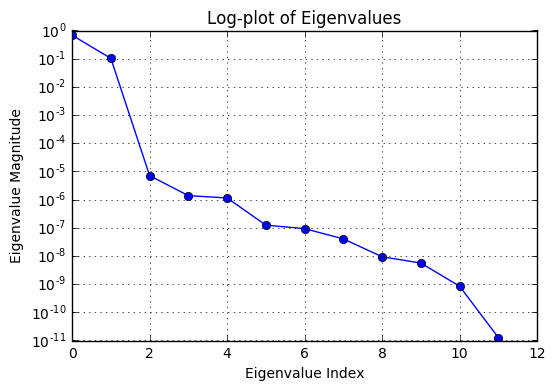

In [84]:
import matplotlib.pyplot as plt
plt.semilogy( eigenvalue.real, '-o' )
plt.title("Log-plot of Eigenvalues")
plt.xlabel( "Eigenvalue Index" )
plt.ylabel( "Eigenvalue Magnitude" )
plt.grid()
plt.show()

Dengan memperhatikan hasil plot di atas, tampak ada 2 eigenvalue yang cukup besar dan signifikan. Sedangkan eigenvalue ketiga tampak berbeda cukup jauh dengan 2 eigenvalue teratas. Coba kita lihat eigenvalue dengan lebih dekat. 

In [85]:
dfeval = pd.DataFrame(eigenvalue)
print(dfeval)

               0
0   6.797401e-01
1   1.026475e-01
2   7.078818e-06
3   1.381044e-06
4   1.143978e-06
5   1.241323e-07
6   9.314363e-08
7   4.028156e-08
8   9.370299e-09
9   5.591594e-09
10  8.430642e-10
11  1.268308e-11


Dua eigenvalue teratas bernilai 6.79 dan 1.03, sedangkan eigenvalue ketiga teratas adalah 1.02E-06 atau kira-kira 0.00000102. Perbedaan ini cukup besar. Secara matematis, tampak memilih nilai _k_ = 2 adalah optimal, namun karena kita mereduksi dari 12 dimensi akan lebih baik untuk memilih nilai _k_ = 3. Di sinilah, kita harus bisa mempertimbangkan tentang tujuan kita melakukan _dimensionality reduction_. Untuk pembelajaran, kita akan memilih _k_ = 2 terlebih dahulu kemudian kita akan mendapatkan _feature vector_.

In [89]:
# Menentukan jumlah principal components
nPrincipal = 2

# kita bangun vektor baru
# dari nPrincipal pertama eigenvector
fv = eigenvector[:,:nPrincipal]
dfNew = pd.DataFrame(fv)

print('New feature vector \n%s\n' %dfNew)

New feature vector 
               0         1
0   4.250519e-02  0.999084
1   9.990941e-01 -0.042495
2   1.541582e-04 -0.000300
3  -3.061344e-04 -0.000143
4  -7.123808e-05 -0.000136
5  -7.658603e-05  0.001229
6   8.882439e-06  0.000036
7  -1.020599e-04 -0.000082
8  -2.010861e-03  0.004920
9  -1.987335e-04 -0.000222
10  6.751192e-07 -0.000009
11 -2.180895e-04 -0.000223



<a name="final"></a>
## Mendapatkan Matriks Proyeksi
Kita telah memilih 2 eigenvector yang kini merepresentasikan 'permukaan' tempat proyeksi akan dilakukan. Tentunya eigenvector ini belum memiliki arti bagi kita, karena belum ditransformasikan kembali ke matriks nilai semula. Di sinilah proyeksi dilakukan. Kita akan transformasikan matriks hasil normalisasi dengan _feature vector_ yang didapat.

In [122]:
# Transformasikan data matrixNorm dengan Feature Vector
# transformedData = fv.T * matrixNorm.T
transformedData = matrixNorm.dot(fv)
dfTranformed = pd.DataFrame(transformedData)
print('Transformed data \n%s\n' %dfTranformed)

Transformed data 
           0         1
0   4.549690 -0.478930
1   2.957779 -0.361129
2   3.654173 -0.433452
3   2.970447 -0.380997
4   3.671871  0.772835
5   2.941583 -0.173099
6   2.186870 -0.391751
7   2.828338 -0.320701
8   5.217330 -0.502338
9   2.896971 -0.415051
10  3.004851 -0.422382
11  2.921954 -0.403250
12  2.666130 -0.422316
13  2.374419 -0.239589



Kalau diperhatikan kini kita mendapatkan matris 14x2, artinya kita mendapatkan 14 negara dengan 2 fitur baru. Fitur baru ini yang disebut _principal components_. Sekarang kita akan melakukan plot terhadap data hasil transformasi ini.

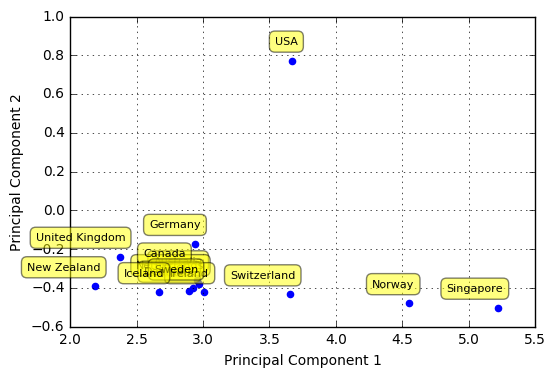

In [120]:
plt.scatter(transformedData[:,0], transformedData[:,1], color='b')
for country, x, y in zip(('Norway','Australia','Switzerland','Netherlands','USA','Germany','New Zealand','Canada','Singapore',
                         'Denmark', 'Ireland','Sweden','Iceland','United Kingdom'), transformedData[:,0], transformedData[:,1]):
    plt.annotate(country, xy=(x,y), xytext = (4, 10), textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), fontsize=8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Makna Principal Component Analysis (PCA)
PCA menggunakan aljabar linier untuk melakukan proyeksi keseluruhan data dengan tujuan mempertahakan informasi relevan yang ada di dalamnya. Hal ini dibuktikan secara matematis maupun penjelasan intuitif (yang sebenarnya pakai matematika juga). Sumber yang sangat jelas menjelaskan _behind the scenes_ dari PCA bisa dicek di:  
   * [Artikel PCA di Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)
   * [Q & A di Stat.StackExchange](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

Keduanya komprehensif. Di wikipedia berfokus kepada aljabar liniernya, sedangkan di stackexchange ada penulis yang menjelaskan secara intuisi dan logika. Pemahaman matematik yang baik diperlukan di sini. Misalnya, eigenvektor yang didapat itu menunjukkan vektor arah yang baru dan eigenvalue yang didapat menunjukkan nilai besar vektor tersebut. Dengan memilih _k_ eigenvektor, berarti kita akan mendapatkan _k_ fitur baru yang biasa disebut _principal components_.  
## Kelemahan PCA
Harus diakui bahwa fitur baru yang didapat cukup susah untuk diinterpretasikan dan dimengerti. Kita bisa melihat dari plot terakhir yang digambar bahwa muncul hubungan yang lebih mudah dilihat, namun maksud dari fitur di sumbu x maupun sumbu y susah dipahami. Walau demikian, PCA sering sekali dipakai di berbagai kompetisi data science, seperti di [kaggle](https://www.kaggle.com/), karena kecepatannya dalam mereduksi fitur.  
## Seleksi Fitur
Hal menarik adalah pasti kita pernah berpikir seandainya kita tidak menyerahkan 'semua' proses dalam _dimensionality reduction_ ini kepada mesin. Sebenarnya ketika memilih _k_ fitur, kita sudah menggunakan intuisi kita walau banyak dipengaruhi oleh nilai matematis yang dihasilkan. Sebagian pakar lain mengganggap kemudahan dan kecepatan PCA bisa mengurangi pemahaman akan model yang dibangun. Semisalnya, hasil keluaran PCA akan digunakan untuk analisis biaya premi asuransi, maka kita akan kesusahan untuk menjelaskan fitur apa saja yang digunakan, karena kita hanya punya _principal components_.
Sebagia analis dan data scientist tidak menggunakan PCA, melainkan seleksi fitur atau _feature selection_. Seleksi fitur menggunakan pemahaman domain kepakaran untuk memahami masing-masing fitur yang ada sebelum melakukan reduksi. Di contoh kita tentang human development berdasarkan GDP, berarti kita harus memiliki pemahaman yang baik tentang dunia ekonomi dan pembangunan, sebelum melakukan seleksi fitur. Bernard Flury di bukunya [A First Course in Multivariate Analysis](https://www.amazon.com/First-Course-Multivariate-Statistics-Springer/dp/038798206X/ref=sr_1_1?s=books&ie=UTF8&qid=1479448846&sr=1-1&keywords=bernard+flury) berpendapat bahwa memang metode terbaik untuk melakukan reduksi fitur membutuhkan **_subjective choice, careful thought, and some experience_**.